In [64]:
% matplotlib inline
import pandas as pd
import tensorflow as tf
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

UsageError: Line magic function `%` not found.


In [37]:
# Load data
file_path = Path("Resources/final_sample.csv")
df = pd.read_csv(file_path)
df.head()

,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,action_taken,applicant_ethnicity,co_applicant_ethnicity,...,hoepa_status,lien_status,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,Region,action_taken_summary
0,NCUA,Conventional,One to Four-Family,Refinancing,Not Owner Occupied,123.0,Not Applicable,Application Approved but not Accepted,Not Hispanic or Latino,Not Hispanic or Latino,...,Not a HOEPA Loan,Secured by First Lien,2310.0,20.35,65300.0,74.28,941.0,3848.0,MW,0
1,HUD,Conventional,One to Four-Family,Home Purchase,Owner Occupied,387.0,Not Applicable,Application Approved but not Accepted,Hispanic or Latino,Not Hispanic or Latino,...,Not a HOEPA Loan,Secured by First Lien,5192.0,96.51,64300.0,53.53,397.0,1056.0,W,0
2,HUD,Conventional,One to Four-Family,Refinancing,Owner Occupied,376.0,Not Applicable,Application Approved but not Accepted,Not Hispanic or Latino,Not Hispanic or Latino,...,Not a HOEPA Loan,Secured by First Lien,12130.0,66.65,63200.0,112.07,921.0,2099.0,W,0
3,HUD,FHA-Insured,One to Four-Family,Refinancing,Owner Occupied,272.0,Not Applicable,Application Approved but not Accepted,Not Hispanic or Latino,Not Hispanic or Latino,...,Not a HOEPA Loan,Secured by First Lien,6335.0,27.73,91500.0,136.37,1406.0,1541.0,MA,0
4,NCUA,Conventional,One to Four-Family,Home Improvement,Owner Occupied,40.0,Not Applicable,Application Approved but not Accepted,Info not Provided by Applicant,No Co-Applicant,...,Not a HOEPA Loan,Secured by a Subordinate Loan,5625.0,5.33,79600.0,153.58,1693.0,1679.0,MW,0


In [38]:
df.isnull().sum()

agency_code                       0
loan_type                         0
property_type                     0
loan_purpose                      0
owner_occupancy                   0
loan_amount_000s                  0
preapproval                       0
action_taken                      0
applicant_ethnicity               0
co_applicant_ethnicity            0
applicant_race_1                  0
co_applicant_race_1               0
applicant_sex                     0
co_applicant_sex                  0
applicant_income_000s             0
purchaser_type                    0
hoepa_status                      0
lien_status                       0
population                        0
minority_population               0
hud_median_family_income          0
tract_to_msamd_income             0
number_of_owner_occupied_units    0
number_of_1_to_4_family_units     0
Region                            0
action_taken_summary              0
dtype: int64

In [39]:
# Drop action_taken and purchaser type column
df = df.drop(columns=["action_taken", "purchaser_type"])

In [40]:
# Generate our categorical variable lists
action_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df[action_cat].nunique()

agency_code               6
loan_type                 4
property_type             2
loan_purpose              3
owner_occupancy           3
preapproval               3
applicant_ethnicity       4
co_applicant_ethnicity    5
applicant_race_1          7
co_applicant_race_1       8
applicant_sex             4
co_applicant_sex          5
hoepa_status              2
lien_status               4
Region                    7
dtype: int64

In [41]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[action_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(action_cat)
encode_df.head()

C:\Users\sherr\anaconda3\envs\ml2\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,agency_code_CFPB,agency_code_FDIC,agency_code_FRS,agency_code_HUD,agency_code_NCUA,agency_code_OCC,loan_type_Conventional,loan_type_FHA-Insured,loan_type_FSA/RHS,loan_type_VA-Guaranteed,...,lien_status_Not Secured by Lien,lien_status_Secured by First Lien,lien_status_Secured by a Subordinate Loan,Region_MA,Region_MW,Region_NE,Region_NW,Region_SE,Region_SW,Region_W
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
###

# NEED TO DROP ALL N/A COLUMNS

###

In [42]:
# Merge dummy columns and drop originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(action_cat, axis=1)
df.head()

,loan_amount_000s,applicant_income_000s,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,action_taken_summary,agency_code_CFPB,...,lien_status_Not Secured by Lien,lien_status_Secured by First Lien,lien_status_Secured by a Subordinate Loan,Region_MA,Region_MW,Region_NE,Region_NW,Region_SE,Region_SW,Region_W
0,123.0,187.0,2310.0,20.35,65300.0,74.28,941.0,3848.0,0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,387.0,148.0,5192.0,96.51,64300.0,53.53,397.0,1056.0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,376.0,208.0,12130.0,66.65,63200.0,112.07,921.0,2099.0,0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,272.0,111.0,6335.0,27.73,91500.0,136.37,1406.0,1541.0,0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40.0,120.0,5625.0,5.33,79600.0,153.58,1693.0,1679.0,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100725 entries, 0 to 100724
Data columns (total 76 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   loan_amount_000s                                               100725 non-null  float64
 1   applicant_income_000s                                          100725 non-null  float64
 2   population                                                     100725 non-null  float64
 3   minority_population                                            100725 non-null  float64
 4   hud_median_family_income                                       100725 non-null  float64
 5   tract_to_msamd_income                                          100725 non-null  float64
 6   number_of_owner_occupied_units                                 100725 non-null  float64
 7   number_of_1_to_4_family_units                  

In [45]:
# Define features and targets
y = df["action_taken_summary"]
X = df.drop(columns="action_taken_summary")

In [46]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [47]:
# Create StandardScaler instance, fit to X, scale
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [48]:
# Create decision tree classifier
model1 = tree.DecisionTreeClassifier()
model1 = model1.fit(X_train_scaled, y_train)

In [49]:
predictions = model1.predict(X_test_scaled)

In [50]:
# Calculate confusion matrix and accuracy score
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index= ["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"])

acc_score = accuracy_score(y_test, predictions)

In [51]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2136,3448
Actual 1,3828,15770


Accuracy Score: 0.7110634580255738
              precision    recall  f1-score   support

           0       0.36      0.38      0.37      5584
           1       0.82      0.80      0.81     19598

    accuracy                           0.71     25182
   macro avg       0.59      0.59      0.59     25182
weighted avg       0.72      0.71      0.71     25182



In [58]:
# Create a random forest classifier
model2 = RandomForestClassifier(n_estimators=500, random_state=21)

In [59]:
# Fit model
model2 = model2.fit(X_train_scaled, y_train)

In [60]:
predictions2 = model2.predict(X_test_scaled)

In [61]:
# Calculate confusion matrix and accuracy score
cm = confusion_matrix(y_test, predictions2)
cm_df = pd.DataFrame(cm, index= ["Actual 0", "Actual 1"], columns = ["Predicted 0", "Predicted 1"])

acc_score = accuracy_score(y_test, predictions2)

In [62]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score: {acc_score}")
print(classification_report(y_test, predictions2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1338,4246
Actual 1,786,18812


Accuracy Score: 0.8001747279803034
              precision    recall  f1-score   support

           0       0.63      0.24      0.35      5584
           1       0.82      0.96      0.88     19598

    accuracy                           0.80     25182
   macro avg       0.72      0.60      0.61     25182
weighted avg       0.77      0.80      0.76     25182



In [63]:
# Sort features by importance
imp_list = sorted(zip(model2.feature_importances_, X.columns), reverse=True)
imp_list

[(0.09982791076469436, 'applicant_income_000s'),
 (0.09453522391075313, 'loan_amount_000s'),
 (0.08223187598936205, 'minority_population'),
 (0.08218675309549324, 'tract_to_msamd_income'),
 (0.07934174816825755, 'number_of_1_to_4_family_units'),
 (0.07916798546059349, 'population'),
 (0.07901154554900378, 'number_of_owner_occupied_units'),
 (0.07108555949018094, 'hud_median_family_income'),
 (0.026953573652223322, 'loan_purpose_Home Purchase'),
 (0.014467906386375289, 'lien_status_Not Applicable (Purchased Loan)'),
 (0.01300552384714672, 'loan_purpose_Refinancing'),
 (0.011626465751804751, 'property_type_Manufactured'),
 (0.010944140561484541, 'property_type_One to Four-Family'),
 (0.010799393071041673, 'agency_code_CFPB'),
 (0.009911455886715973, 'agency_code_HUD'),
 (0.009299173035549394, 'applicant_sex_Male'),
 (0.009280366865979621, 'loan_type_Conventional'),
 (0.009126530924906343, 'Region_SE'),
 (0.0089121058323604, 'applicant_sex_Female'),
 (0.008866022445026819, 'Region_MW'),
 

<AxesSubplot:>

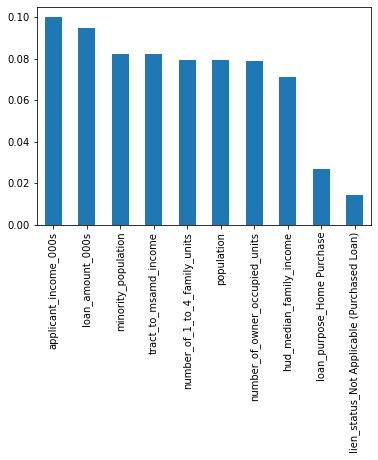

In [65]:
pd.Series(model2.feature_importances_, index=X.columns).nlargest(10).plot(kind='bar')